# RASSVFS Match
This notebook is a tutorial on how to utilize Virgo Filiment Survey (Or any other fits file based database) to match and sort with other databases.

It uses Astropy, matplotlib, and numpy, and so resources on those are helpful as well for understanding.

### RASSCALS Section
Here's where I learned to import the RASSCALS data into python and use numpy and astropy to sort throuhgh and graph it n stuff

In [1]:
#dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.coordinates import Angle
from astropy import units as u

In [2]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
tbl=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")

In [3]:
tbl #view table
# format for accessing columns of data : tablename['Columnname']

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b003,2.2324999999999995,-37.47083333,5,35,8357,60,2.14,42.1,0.2,--
SRGb061,2.93625,28.359722222222217,10,57,7855,163,2.71,41.9,0.06,--
SS2b004,3.6966666666666663,-7.237777778,5,11,5290,65,2.19,41.7,0.14,--
SS2b005,3.8812499999999996,-24.12722222,5,24,7390,35,1.86,42.0,0.15,--
SRGb062,4.6049999999999995,30.070277777777772,13,49,6811,122,2.64,42.66,0.1,0.07
SRGb063,5.409999999999999,22.40555555555555,10,25,5665,87,2.46,42.56,0.11,0.09
SS2b009,6.073333333333332,-14.24361111,5,20,6919,153,2.53,41.9,0.23,--
SRGb067,7.200416666666666,2.905277777777777,8,7,4141,62,2.28,41.5,0.09,--
SRGb069,7.603333333333333,30.97583333333333,9,27,6232,40,2.08,41.8,0.08,--


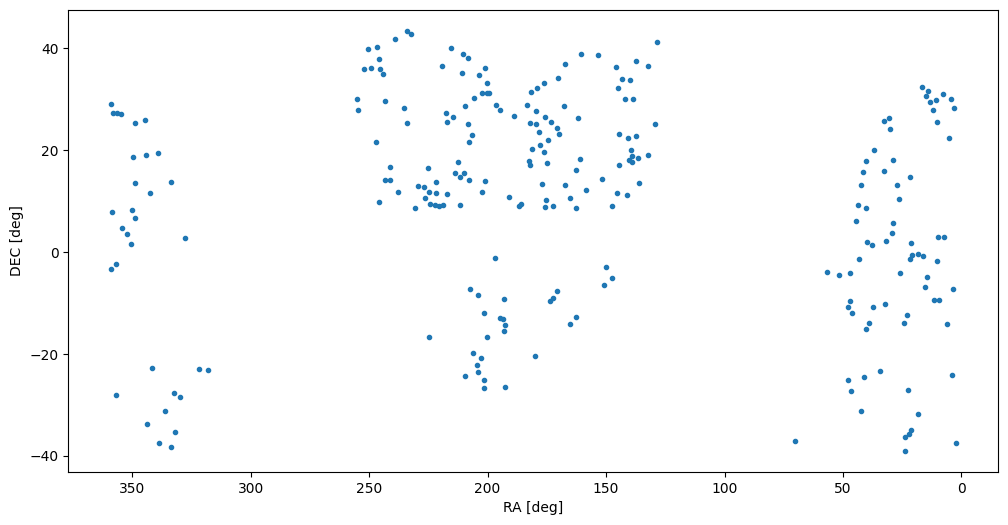

In [4]:
# plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
# format for accessing columns of data : tablename['Columnname']
plt.figure(figsize=(12,6))
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
ax = plt.gca()
ax.invert_xaxis()
plt.show()

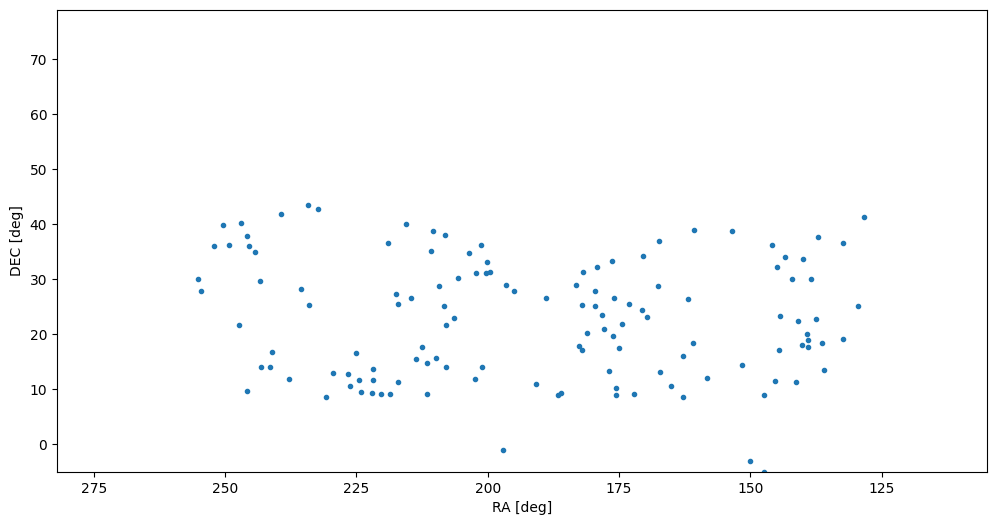

In [5]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()
plt.show()

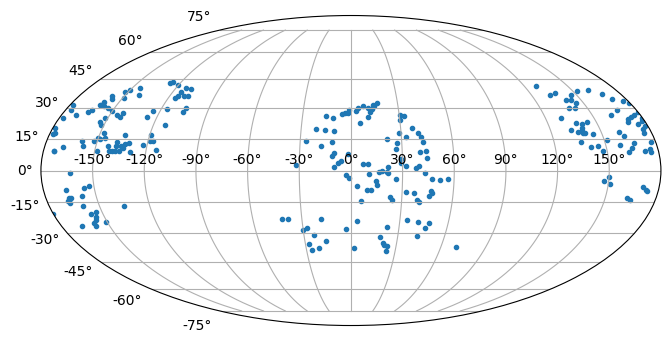

In [6]:
#plotting data as a mollweide image requires data to be in radians
ra = Angle(tbl['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(tbl['DEJ2000']*u.degree)
#plot on mollweide projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,marker='.')
ax.grid(True)

### Rich Groups VFS
Here's where I sorted out the rich groups from the full catalog of VFS data

In [7]:
#import dependancies and directories
from astropy.table import Table
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np
homedir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research'
tabledir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research/VFS .fits'
plotdir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots'

In [8]:
#list all .fits files
os.listdir(tabledir)

['kourkchi_groups_info.fits',
 'rasscals.fits',
 'vf_v2_a100.fits',
 'vf_v2_agc.fits',
 'vf_v2_co.fits',
 'vf_v2_CO_HI.fits',
 'vf_v2_environment.fits',
 'vf_v2_extinction.fits',
 'vf_v2_filament_distances.fits',
 'vf_v2_galfit_g.fits',
 'vf_v2_galfit_r.fits',
 'vf_v2_galfit_W1-fixBA.fits',
 'vf_v2_galfit_W1.fits',
 'vf_v2_galfit_W2.fits',
 'vf_v2_galfit_W3-fixBA.fits',
 'vf_v2_galfit_W3.fits',
 'vf_v2_galfit_W4.fits',
 'vf_v2_galfit_z.fits',
 'vf_v2_halpha.fits',
 'vf_v2_halpha_obs.fits',
 'vf_v2_hyperleda.fits',
 'vf_v2_kourkchi_galaxies.fits',
 'vf_v2_legacy_dr9.fits',
 'vf_v2_legacy_ephot.fits',
 'vf_v2_legacy_viewer.fits',
 'vf_v2_magphys_legacyExt_16-Feb-2024.fits',
 'vf_v2_magphys_legacyExt_17-Feb-2024.fits',
 'vf_v2_magphys_legacyExt_final.fits',
 'vf_v2_magphys_nozband_legacyExt_16-Feb-2024.fits',
 'vf_v2_magphys_nozband_legacyExt_17-Feb-2024.fits',
 'vf_v2_main.fits',
 'vf_v2_matchTempel_groupinfo.fits',
 'vf_v2_nedquery.fits',
 'vf_v2_nsa_v0.fits',
 'vf_v2_nsa_v1.fits',
 'vf

In [9]:
#read in all .fits files from a directory using a python script "readtablesv2.py" by Rose Finn
%run "C:\Users\Oran1\Python Scripts\readtablesv2.py" --tabledir "C:/Users/Oran1/OneDrive - University of Kansas/Research/VFS .fits/"

<Figure size 640x480 with 0 Axes>

In [10]:
v.main

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747


Plotting all VFS data on a graph (using tutorial)

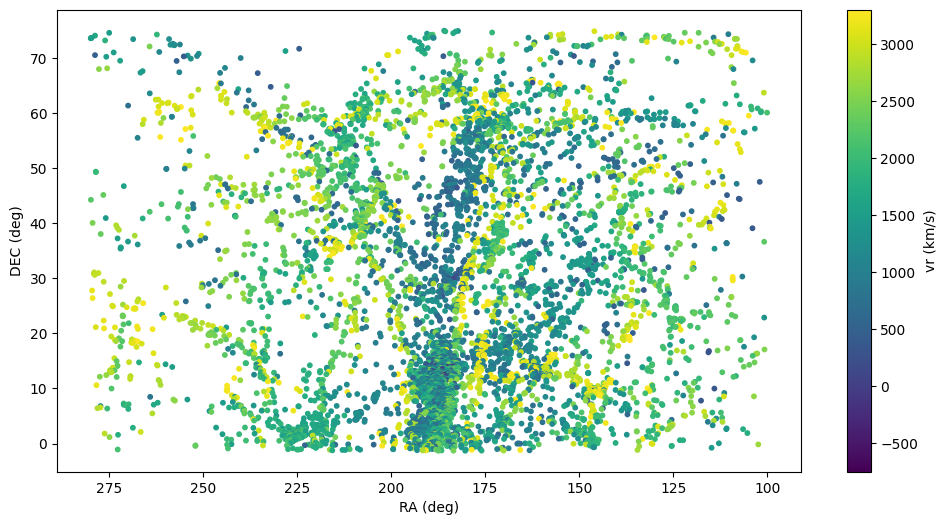

In [11]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=10) # plotting main.ra as x, main.dec as y, and main.vr as color
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

In [12]:
v.main

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747


Learning to use flags to sort through VFS data (tutorial)

Text(0, 0.5, 'DEC (deg)')

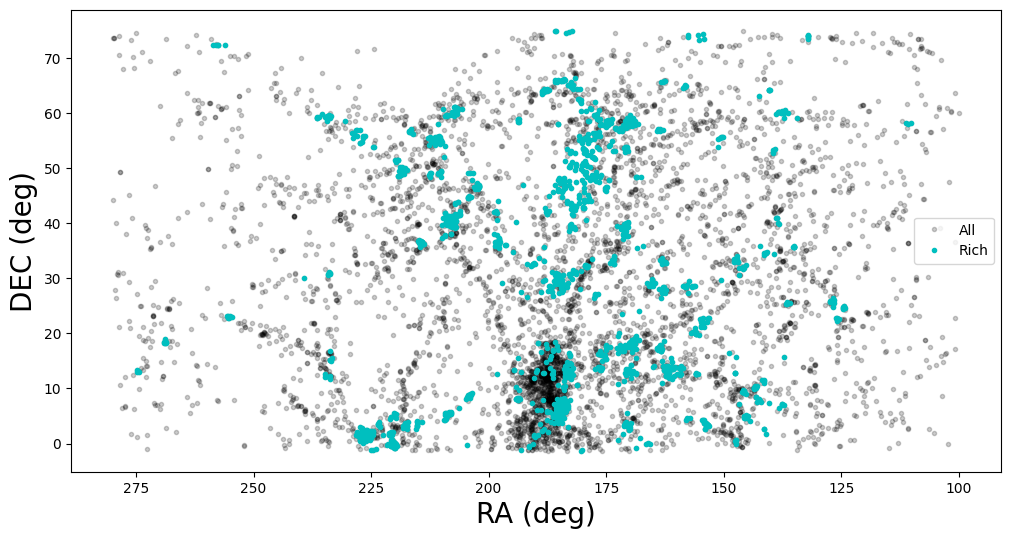

In [13]:
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,label='All')
# plot RICH sources
flag =  v.env['rich_group_memb']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=3,alpha=1,label='Rich' )
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)

Plotting only rich galaxies (me)

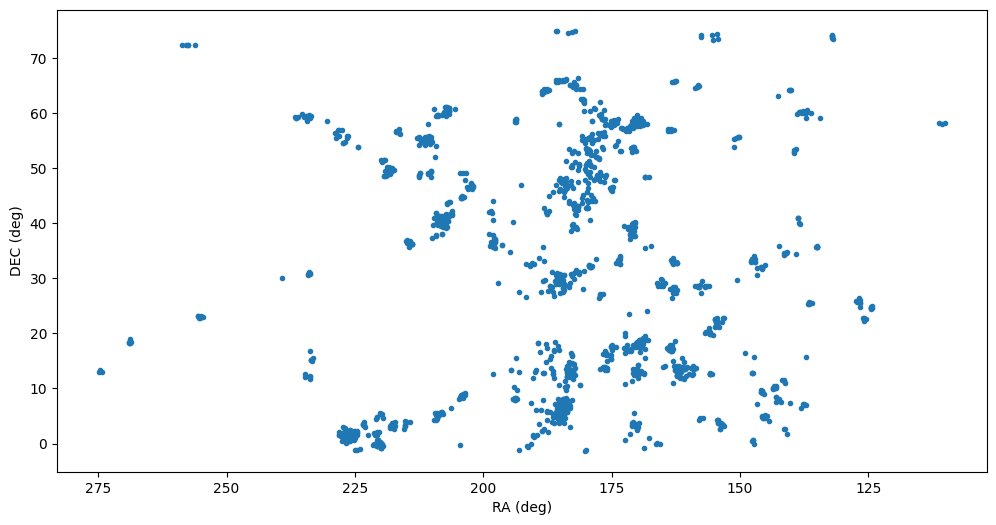

In [14]:
# make a flag for galaxies who are marked true in the column rich group members.
flag = (v.env['rich_group_memb']==True)
plt.figure(figsize=(12,6))
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],marker='.')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
ax = plt.gca()
ax.invert_xaxis()

### MATCHING RASSVFS(rich)
Here's where I matched the two datasets using AstroPy's SkyCoord functions.

In [15]:
#dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import os
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

In [16]:
#read in all .fits files from a directory using a python script "readtablesv2.py" by Rose Finn
%run "C:\Users\Oran1\Python Scripts\readtablesv2.py" --tabledir "C:/Users/Oran1/OneDrive - University of Kansas/Research/VFS .fits/"

<Figure size 640x480 with 0 Axes>

In [17]:
#checking if .fits files were read in correctly
v.env

VFID,DM,SGX,SGY,SGZ,nCI08,nCI08_err,distSGX_Virgo,distSGY_Virgo,distSGZ_Virgo,n5th_2D,n5th_2D_err,n5th,n5th_err,Vcosmic,Vmodel,Vmedian,poor_group_memb,rich_group_memb,pure_field,nearest_filament_dist_2D,nearest_filament_dist_3D,filament,filament_PA,orientation_wrt_filament,filament_member,mem_phase_space,cluster_member,mem_Mould00,sep_degree
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,bytes40,float64,float64,bool,bool,bool,bool,float64
VFID0000,31.941844830063214,13.145689815736862,11.738032079989287,4.111198355924238,0.09100991167247066,0.02686072613022795,15.409025350662194,1.842051278949052,4.526500946558278,0.7856420753367201,0.3513498172873834,0.07541017414247678,0.03372445511553499,1809.6754122333089,1809.6754122333089,0.0,False,True,False,3.379527299081431,5.217677443566046,Bootes,113.42767598067097,76.57232401932903,False,False,False,False,62.570119372065726
VFID0001,30.824492927707986,7.90894905971585,7.017661982903995,2.284969213716576,0.0461352792838557,0.013616397148532532,10.172284594641182,-2.87831881813624,2.7002718043506153,0.23578532750520065,0.1054464040797359,0.056695964637788275,0.025355206196003763,1081.7584723176835,1722.6764108994216,1081.7584723176835,False,True,False,5.171323556709356,5.232772280613474,Leo_Minor,106.69403584063132,25.545964159368694,False,False,False,False,62.58939048635605
VFID0002,33.08861233285418,24.57232008873139,18.236938715608805,2.303486373551084,0.09538853839762654,0.028153036947034134,26.835655623656724,8.34095791456857,2.7187889641851237,0.9613015495936771,0.4299071223534695,0.17530005643618327,0.07839656853017106,3068.6982545259793,3380.6160975434336,3068.6982545259793,False,False,True,14.782650818489234,14.915240996710157,Bootes,117.24052264173427,27.759477358265727,False,False,False,False,66.58444470534114
VFID0003,32.377721425989066,16.04972421363977,14.3805709158205,4.987924263296796,0.22478546606423896,0.06634333262223746,18.313059748565102,4.484590114780266,5.403226853930836,1.1359651708786418,0.5080190684313615,0.3621526842486207,0.16195960404278664,2211.9535611201745,2211.9535611201745,0.0,False,True,False,5.840428989011135,5.990562912055835,Bootes,113.42767598067097,52.57232401932903,False,False,False,False,62.45929044800913
VFID0004,32.229043216376944,15.062039166171804,13.42946756799603,4.409443857800289,0.5007172431173859,0.14778202163805867,17.325374701097136,3.5334867669557948,4.824746448434329,1.9908993941285014,0.890357276326895,0.5878042339602495,0.26287404491946165,2065.5721196274976,2065.5721196274976,0.0,False,True,False,5.008853600511673,5.504963104498067,Bootes,113.42767598067097,58.24232401932902,False,False,False,False,62.47768115452717
VFID0005,32.36852023075264,16.36887945443161,14.24733084177353,3.77071849313914,0.13802755894500718,0.04073754595640609,18.632214989356942,4.351350040733296,4.18602108377318,0.710316038718794,0.31766298961671924,0.14521501536328987,0.0649421291411985,2202.600664358308,2291.262875707811,2202.600664358308,False,False,True,6.45054229250542,6.615030952002659,Bootes,113.42767598067097,38.25232401932904,False,False,False,False,62.775312807551586
VFID0006,32.87852023075263,23.823428368645985,14.429624490058709,0.4977223192390418,0.15240610288342013,0.04498123901998244,26.086763903571317,4.533643689018474,0.9130249098730814,0.8477993886325675,0.3791474128530367,0.22690642225734137,0.10147563693973731,2785.709119178054,2668.9580301351834,2785.709119178054,False,False,True,13.230324533410682,13.253159491214863,LeoII_B,151.0938249425952,21.03617505740479,False,False,False,False,71.74274616620686
VFID0007,32.79468989279763,23.147324448597697,13.506784603390928,0.35156759342053373,0.19910443878305567,0.05876381707424648,25.41065998352303,3.610803802350693,0.7668701840545733,0.707759758449266,0.31651978632627803,0.2382651684812946,0.106555422678923,2680.215400343395,2680.215400343395,0.0,False,False,True,12.6093

In [18]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
tbl=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")
tbl

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b003,2.2324999999999995,-37.47083333,5,35,8357,60,2.14,42.1,0.2,--
SRGb061,2.93625,28.359722222222217,10,57,7855,163,2.71,41.9,0.06,--
SS2b004,3.6966666666666663,-7.237777778,5,11,5290,65,2.19,41.7,0.14,--
SS2b005,3.8812499999999996,-24.12722222,5,24,7390,35,1.86,42.0,0.15,--
SRGb062,4.6049999999999995,30.070277777777772,13,49,6811,122,2.64,42.66,0.1,0.07
SRGb063,5.409999999999999,22.40555555555555,10,25,5665,87,2.46,42.56,0.11,0.09
SS2b009,6.073333333333332,-14.24361111,5,20,6919,153,2.53,41.9,0.23,--
SRGb067,7.200416666666666,2.905277777777777,8,7,4141,62,2.28,41.5,0.09,--
SRGb069,7.603333333333333,30.97583333333333,9,27,6232,40,2.08,41.8,0.08,--


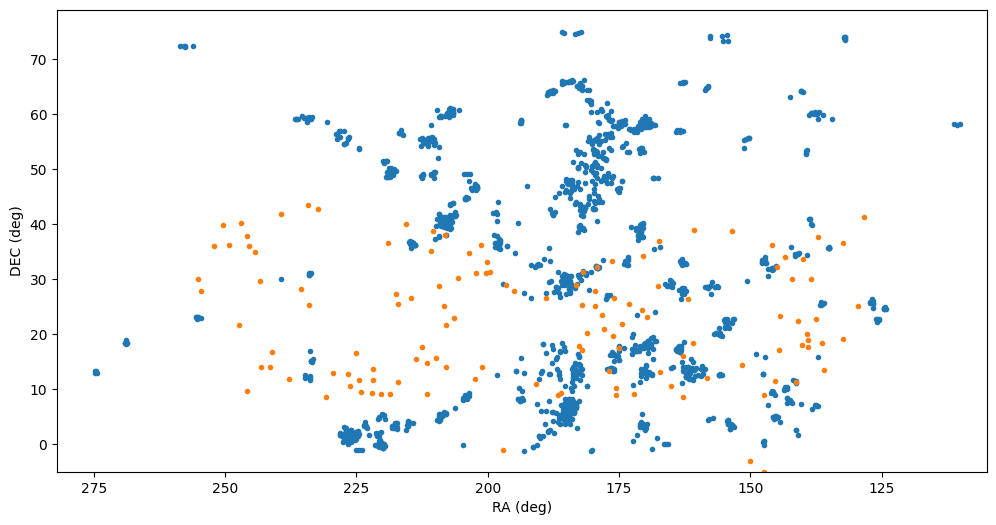

In [19]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
flag = (v.env['rich_group_memb']==True)
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],marker='.')
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()

In [20]:
#changing ra/dec for each group into skycoords to calculate distance
flag=(v.env['rich_group_memb']==True)
x,y=v.main['RA'][flag],v.main['DEC'][flag]
richcoords = SkyCoord(x*u.deg,y*u.deg)
m,n=tbl['RAJ2000'],tbl['DEJ2000']
rascoords = SkyCoord(m*u.deg, n*u.deg)

In [21]:
#comparing rascal coords to rich galaxy groups within a sepeartaion of 47.6 arcmin (average rich group radius found below)
max_sep = (47.6/60) * u.degree
idx, d2d, d3d = rascoords.match_to_catalog_3d(richcoords)
sep_constraint = d2d < max_sep
c_matches = rascoords[sep_constraint]
catalog_matches = richcoords[idx[sep_constraint]]

In [22]:
#displaying matches as pure ra/dec data
catalog_matches

<SkyCoord (ICRS): (ra, dec) in deg
    [(141.4272195, 11.4321394), (145.190985 , 32.4724657),
     (175.0670055, 17.4572623), (177.2684775, 13.6295798),
     (179.226015 , 32.1588328), (181.9582455, 31.5521339),
     (183.086748 , 29.2093726), (197.0512485, 29.0882443),
     (208.0278165, 38.0670294)]>

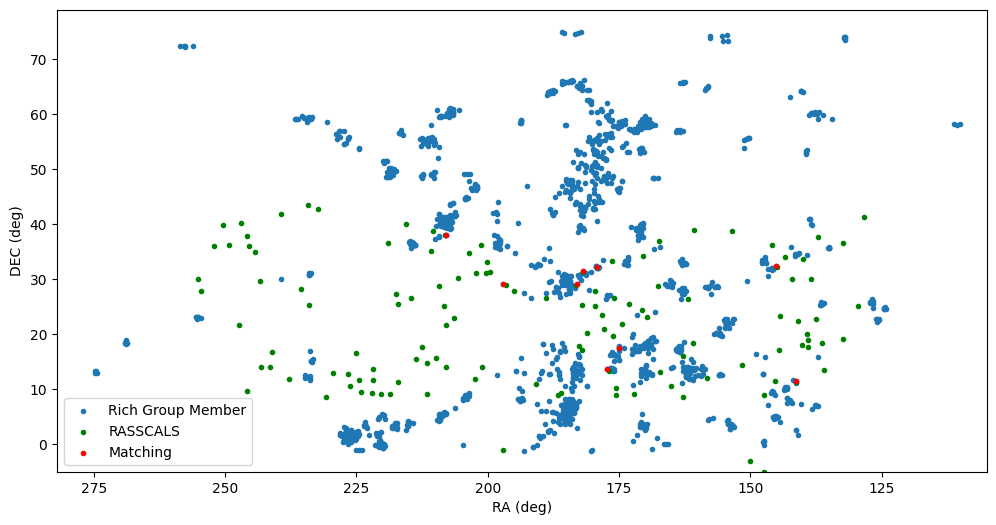

In [23]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
flag = (v.env['rich_group_memb']==True)
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],marker='.',label='Rich Group Member')
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],color='green',marker='.',label='RASSCALS')
plt.scatter(catalog_matches.ra.value,catalog_matches.dec.value,c='red',marker='.',label='Matching')
plt.legend()
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()
plt.savefig('matching.png')

### Finding angular stuff
Using triginometry and astropy packages allows us to find the angular sizes of galaxy groups and give us a radius that RASSCALS groups should be within to "match" our groups. \
I made new tables to match certain columns, filtering out "unnecessary" columns, but it's possible and more safe to do it all at once. \
Using "flags" such as "rich_group = (env['rich_group_memb'] == True)" are more "clean" for visualization, but not necessary, and you can just plug the filters directly into where they are in the executing code.

In [24]:
# dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.table import Table, join, Column, unique
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic
from astropy.coordinates import Angle, Latitude, Longitude
from astropy import units as u

In [25]:
cd C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits\

C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits


C:\Users\Oran1\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [26]:
# importing each table and filtering out unneeded columns. Comment/uncomment keep_columns lines as needed. Should not affect calculations, just makes it more messy looking.
kourk = Table.read("kourkchi_groups_info.fits")
kourk.keep_columns(['PGC1', 'D','Rg_dyn','Glon','Glat','Mem'])
main = Table.read('vf_v2_main.fits')
main.keep_columns(['VFID', 'RA','DEC'])
env = Table.read("vf_v2_environment.fits")
env.keep_columns(['VFID', 'rich_group_memb'])
kourkgal = Table.read("vf_v2_kourkchi_galaxies.fits")
kourkgal.keep_columns(["VFID","PGC1","Kflag",'Mem'])

In [27]:
gc = SkyCoord(l=kourk['Glon']*u.degree, b=kourk['Glat']*u.degree, frame='galactic') # saving galactic coordinates of group centers as a SkyCoords

In [28]:
icrs = gc.icrs # converting group centers to RA/DEC coordinates

In [29]:
# adding group centers in ICRS to the table
kourk.add_column((icrs.ra), name ='G_RA')
kourk.add_column((icrs.dec), name ='G_DEC')

In [30]:
rich_group = (env["rich_group_memb"] == True) # filter for only galaxies with a TRUE rich group member flag
Kflag = (kourkgal["Kflag"] == True) # filter for galaxies that there is kourkchi data for

In [31]:
# filter for kourkchi_group_info, deterimining it to be calculatable as long as neither distance or radius is set to -1000
computable = (kourk['Rg_dyn'] != -1000) & (kourk['D'] != -1000)

In [32]:
compkourk = kourk[computable] # apply filter to kourk and save as new table, compkourk, with only groups that angular size can be calculated from

In [33]:
# add a new column to compkourk, with caluclated values based upon radius and distance in Mpc. (radian to mas conversion)*((radius)/distance). Small angle approximation.
compkourk.add_column((3437.746771*(((compkourk['Rg_dyn'])/compkourk['D']))), name ='angradiusMOA') 

In [34]:
# performs a join of the main table with only rich group galaxies, and kourkchi galaxies that have kourkchi data, matching their VFID's
#joined = join(main[sortRich],kourkgal[sortKflag],keys='VFID')
joined = join(main,kourkgal,keys='VFID')

In [35]:
joined[rich_group & Kflag]

VFID,RA,DEC,PGC1,Mem,Kflag
bytes8,float64,float64,int64,int64,bool
VFID0000,185.86877249999998,74.9522485,39791,14,True
VFID0001,182.208,74.9042778,39791,14,True
VFID0003,185.5730835,74.8383889,39791,14,True
VFID0004,182.82775049999998,74.8082222,39791,14,True
VFID0011,154.4161905,74.3473859,30019,6,True
VFID0017,157.678335,74.2275172,30019,6,True
VFID0019,155.4540195,74.1769917,30019,6,True
VFID0020,132.0193335,74.0987778,24723,6,True
VFID0022,132.0992085,74.0382222,24723,6,True


In [36]:
# makes a final table by adding the galaxies corresponding data from kourkchi_info.fits, matching the PCG1 number.
final = join(joined[rich_group & Kflag],compkourk,keys='PGC1')

In [37]:
final

VFID,RA,DEC,PGC1,Mem_1,Kflag,Mem_2,Glon,Glat,D,Rg_dyn,G_RA,G_DEC,angradiusMOA
,,,,,,,,,,,deg,deg,
bytes8,float64,float64,int64,int64,bool,int64,float64,float64,float64,float64,float64,float64,float64
VFID0750,110.171655,58.2072731,20884,6,True,6,158.9213,26.9181,31.62,0.145,110.89152451985345,58.05137586337251,15.764493415401644
VFID0763,111.2357745,58.1539276,20884,6,True,6,158.9213,26.9181,31.62,0.145,110.89152451985345,58.05137586337251,15.764493415401644
VFID0767,110.7677085,58.09675,20884,6,True,6,158.9213,26.9181,31.62,0.145,110.89152451985345,58.05137586337251,15.764493415401644
VFID3369,124.5346545,24.5017745,23266,7,True,7,198.3871,29.27,35.32,0.147,124.5143014929415,24.703024556373745,14.307722971036238
VFID3354,124.50634199999999,24.7360929,23266,7,True,7,198.3871,29.27,35.32,0.147,124.5143014929415,24.703024556373745,14.307722971036238
VFID3349,124.5273375,24.7964391,23266,7,True,7,198.3871,29.27,35.32,0.147,124.5143014929415,24.703024556373745,14.307722971036238
VFID3338,124.3376655,24.9626686,23266,7,True,7,198.3871,29.27,35.32,0.147,124.5143014929415,24.703024556373745,14.307722971036238
VFID3363,124.582134,24.5268823,23266,7,True,7,198.3871,29.27,35.32,0.147,124.5143014929415,24.703024556373745,14.307722971036238


In [38]:
richgroups = unique(final,keys='PGC1')
richgroups.keep_columns(['D','angradiusMOA','Rg_dyn','PGC1','G_RA','G_DEC','Mem_1'])

Debug: Displaying Kourkchi PGC1 groups that angular size cannot be computed for

In [39]:
uncomp = (kourk['Rg_dyn'] == -1000) | (kourk['D'] == -1000)

In [40]:
uncomputable = kourk[uncomp]

Uncomputable groups

In [41]:
uncomputable

PGC1,Mem,Glon,Glat,D,Rg_dyn,G_RA,G_DEC
,,,,,,deg,deg
int64,int64,float64,float64,float64,float64,float64,float64
27845,1,136.7127,36.7942,-1000.0,-1000.0,145.94497582864437,74.85943923724287
35608,1,129.7859,41.4339,28.97,-1000.0,173.13431991122206,74.6275443694711
22815,1,139.9986,31.1184,-1000.0,-1000.0,121.91290244052547,74.58460927847646
22064,1,140.1833,30.1542,-1000.0,-1000.0,118.23713597598872,74.5763630851225
61742,1,105.5357,28.1747,20.89,-1000.0,274.9429676172973,74.56835776059832
42595,1,123.8175,42.6908,-1000.0,-1000.0,190.43521172554506,74.42077445587114
2761545,1,140.6043,28.054,-1000.0,-1000.0,110.33355523403766,74.3237779101567
26284,1,138.386,35.6633,-1000.0,-1000.0,139.63436417673805,74.31910802530757


Computable groups

In [42]:
kourk[computable]

PGC1,Mem,Glon,Glat,D,Rg_dyn,G_RA,G_DEC
,,,,,,deg,deg
int64,int64,float64,float64,float64,float64,float64,float64
39791,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474
30019,6,136.0873,39.407,40.46,0.632,154.465214941124,73.55218810201785
42139,4,124.2367,42.9066,20.94,0.212,189.3506089625685,74.18607635577942
24723,6,139.8088,33.9268,27.85,0.13,132.06767667904896,73.97955484372018
23604,4,140.4975,32.5002,29.66,0.198,126.52561930721532,73.86483274332923
26295,2,139.0724,35.872,29.51,0.243,139.34173334862632,73.72982701022482
41947,2,124.4696,43.4061,27.93,0.031,188.8825331080606,73.67462564154101
43426,3,123.0418,44.2398,28.58,0.345,192.5919471542709,72.88822411571434


Graphing histogram in Mpc

Text(0.5, 1.0, '')

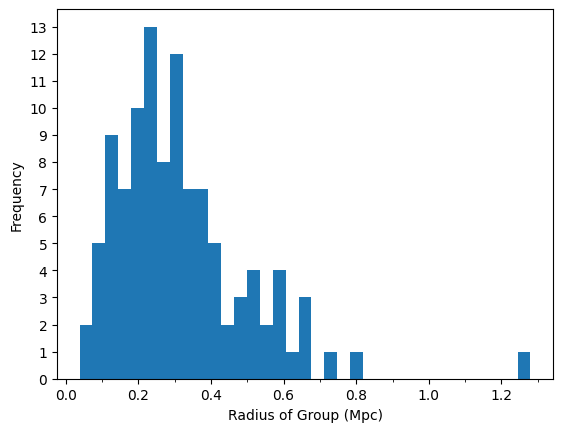

In [43]:
plt.hist(richgroups['Rg_dyn'],bins=35)
# Adding labels and title
plt.xlabel('Radius of Group (Mpc)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.4, step=0.1),minor=True)
plt.yticks(np.arange(0,14, step=1))
plt.title('')
#plt.savefig('histradii.jpg')

(Graph excludes radii in table set at -1000 for individual, non-grouped, galaxies.)

Graphing histogram in angular size

Average angular radius of ALL rich groups is 47.6 arcmin


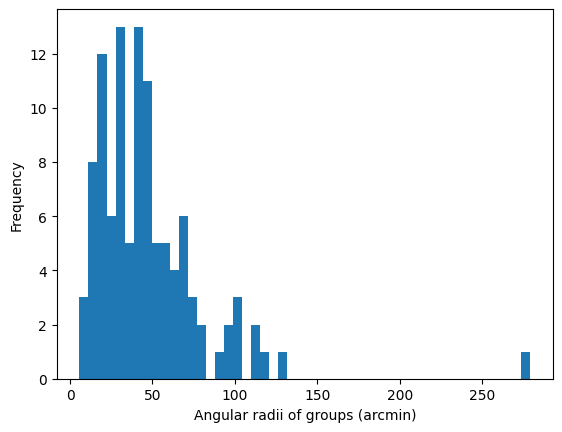

In [44]:
plt.hist(richgroups['angradiusMOA'], bins=50)
# Adding labels and title
plt.xlabel('Angular radii of groups (arcmin)')
plt.ylabel('Frequency')
plt.title('')
#plt.savefig('histangradii.jpg')
print("Average angular radius of ALL rich groups is",round(np.mean(richgroups['angradiusMOA']),1),"arcmin")

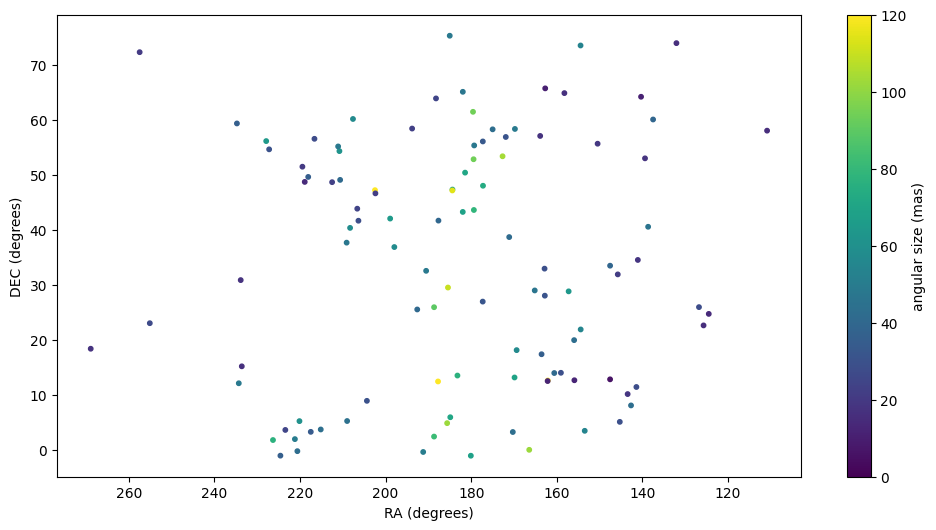

In [45]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(richgroups['G_RA'],richgroups['G_DEC'],c=richgroups['angradiusMOA'],s=10)
#plt.scatter(richgroups['G_RA'],richgroups['G_DEC'],c=richgroups['angradiusMOA'],s=richgroups['angradiusMOA'])
cb = plt.colorbar()
plt.clim(0,120)
cb.set_label('angular size (mas)')
#plt.scatter(final['RA']*60,final['DEC']*60, c='r',marker=',',s=10)
#plt.scatter(ras['RAJ2000'],ras['DEJ2000'],color='green',marker='.',label='RASSCALS')
#plt.scatter(catalog_matches.ra.deg*60,catalog_matches.dec.deg*60,color='red',s=10,marker=',',label='MATCHES')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
#plt.xlabel('RA (minutes)')
#plt.ylabel('DEC (minutes)')
ax = plt.gca()
ax.invert_xaxis()
#plt.savefig('image.jpg')

### Matching RASSCALS 
We can use angular distances that we found above and an astropy package to find Rasscals groups that match our database.

In [46]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
ras=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")

In [47]:
#changing ra/dec for each group into skycoords to calculate distance
x,y=richgroups['G_RA'],richgroups['G_DEC']
richcoords = SkyCoord(x,y)
m,n=ras['RAJ2000'],ras['DEJ2000']
rascoords = SkyCoord(m*u.deg, n*u.deg)

In [48]:
#comparing rascal coords to rich galaxy groups within a sepeartaion of 47.6 arcmin (average rich group radius found below)
max_sep = (47.6/60) * u.degree # value obtained as average from "matching" section above
idx, d2d, d3d = rascoords.match_to_catalog_3d(richcoords)
sep_constraint = d2d < max_sep
c_matches = rascoords[sep_constraint]
catalog_matches = richcoords[idx[sep_constraint]]

In [49]:
catalog_matches

<SkyCoord (ICRS): (ra, dec) in deg
    [(141.42042498, 11.3995343), (188.68107722, 25.9188585)]>

In [50]:
#displaying matches as pure ra/dec data
catalog_matches.ra.deg
catalog_matches.dec.deg

array([11.3995343, 25.9188585])

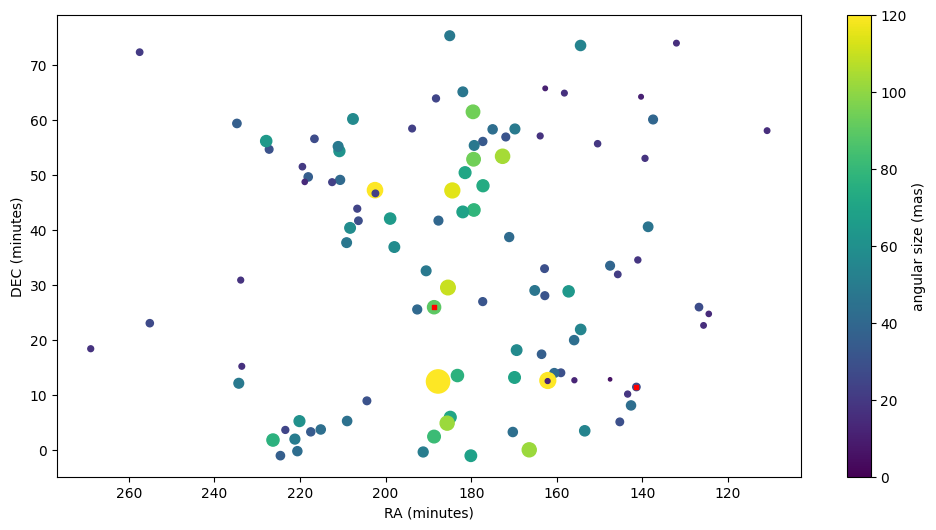

In [51]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(richgroups['G_RA'],richgroups['G_DEC'],c=richgroups['angradiusMOA'],s=richgroups['angradiusMOA'])
cb = plt.colorbar()
plt.clim(0,120)
plt.scatter(catalog_matches.ra.deg,catalog_matches.dec.deg,c='red',s=10,marker=',',label='MATCHES')
plt.xlabel('RA (minutes)')
plt.ylabel('DEC (minutes)')
cb.set_label('angular size (mas)')
ax = plt.gca()
ax.invert_xaxis()
#plt.savefig('matches.jpg')

### Better Matching (per group per recession velocity) (UNDER CONSTRUCTION)
work below is still unfinished

In [52]:
# dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.table import Table, join, Column, unique
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic
from astropy.coordinates import Angle, Latitude, Longitude
from astropy import units as u

In [53]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
ras=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")
main = Table.read('C:/Users/Oran1/OneDrive - University of Kansas/Research/VFS .fits/vf_v2_main.fits')

In [54]:
ras

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b003,2.2324999999999995,-37.47083333,5,35,8357,60,2.14,42.1,0.2,--
SRGb061,2.93625,28.359722222222217,10,57,7855,163,2.71,41.9,0.06,--
SS2b004,3.6966666666666663,-7.237777778,5,11,5290,65,2.19,41.7,0.14,--
SS2b005,3.8812499999999996,-24.12722222,5,24,7390,35,1.86,42.0,0.15,--
SRGb062,4.6049999999999995,30.070277777777772,13,49,6811,122,2.64,42.66,0.1,0.07
SRGb063,5.409999999999999,22.40555555555555,10,25,5665,87,2.46,42.56,0.11,0.09
SS2b009,6.073333333333332,-14.24361111,5,20,6919,153,2.53,41.9,0.23,--
SRGb067,7.200416666666666,2.905277777777777,8,7,4141,62,2.28,41.5,0.09,--
SRGb069,7.603333333333333,30.97583333333333,9,27,6232,40,2.08,41.8,0.08,--


In [55]:
main

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747


In [56]:
#each of these is an array of nras x nVFS in length.  The only second dimension filled by non-empty elements will be the RASSCALS
#groups at cz<4000
import numpy as np
matchflag = np.array([])
nearczflag = np.array([])
nearskyflag = np.array([])
rasflag = ras['cz'] < 4000.
for i, czval in enumerate(ras['cz']):
    if(rasflag[i]):
        #make boolean array for all galaxies within 500km/s of RASSCALS group
        nearczflag = np.append(nearczflag, (abs(main['vr'] - czval)<500.))
        #measure distance on sky
        dist = np.sqrt(((ras['RAJ2000'][i] - main['RA'])*np.cos(main['DEC'] * np.pi / 180.))**2 + (ras['DEJ2000'][i] - main['DEC'])**2)
        #groupangdiam = #code to convert 2*ras[‘rg’][i] to degrees
        #select things close on sky
        nearskyflag = np.append(nearskyflag, (dist<100)) #fix
        #find things close on sky to RASSCALS and close in velocity
        matchflag = np.append(matchflag, (nearskyflag[i] and nearczflag[i]))
    else:
        #for groups at too high velocity, append an empty value
        nearczflag = np.append(nearczflag, np.array([]))
        nearskyflag = np.append(nearskyflag, np.array([]))
        matchflag = np.append(matchflag, np.array([]))

In [60]:
ras[ras['cz']<4000] # RASSCALS groups with a recession velocity (redshift) less than 4000, around the cutoff for our survey

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b075,32.419999999999995,-10.18388889,5,6,3699,52,2.09,41.5,0.14,--
SRGb140,36.91541666666666,20.016666666666662,5,7,3931,43,1.99,42.0,0.12,--
SS2b110,46.04624999999999,-12.08416667,8,9,3590,124,2.56,42.16,0.09,0.34
SS2b129,56.57916666666666,-4.030555556,6,7,3728,60,2.18,41.6,0.12,--
NRGb041,141.30083333333332,11.280277777777776,5,6,3616,84,2.32,41.5,0.14,--
NRGb147,175.0558333333333,17.52972222222222,7,8,3533,56,2.19,41.5,0.08,--
NRGb157,176.9658333333333,13.275833333333331,9,11,3745,152,2.66,41.5,0.07,--
NRGb165,179.23999999999998,32.24166666666666,9,9,3519,42,2.09,41.6,0.08,--
NRGb167,179.5683333333333,27.781666666666663,5,6,3729,53,2.08,41.5,0.19,--


In [58]:
main[(abs(main['vr'] - 3599) < 500)]

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0026,141.41841599999998,73.9001194,3152.1,27.360325,True,PGC026731,26731,0,0,0,CGCG 332-048,True,False,False,False,VFID0026,False,False,False,True,True,False,VFID0026-CGCG332-048
VFID0029,142.8079995,73.8105833,3113.1,33.198715,True,UGC05052,27027,0,0,0,UGC 05052,True,False,False,False,VFID0029,False,False,False,True,True,False,VFID0029-UGC05052
VFID0032,129.9781065,73.7540147,3286.8,31.054264,True,UGC04502,24360,0,0,0,UGC 04502,True,False,False,False,VFID0032,False,False,False,True,True,False,VFID0032-UGC04502
VFID0061,120.509523,73.0453448,3165.0,45.82698,True,UGC04137,22534,0,0,0,UGC 04137,True,False,False,False,VFID0061,False,False,False,True,True,False,VFID0061-UGC04137
VFID0065,131.9899995,72.8957222,3123.0,37.76776,True,NGC2641,24722,0,0,0,NGC 2641,True,False,False,False,VFID0065,False,False,False,True,True,False,VFID0065-NGC2641
VFID0070,122.746833,72.7944444,3150.0,35.004288,True,UGC04242,22947,0,0,0,UGC 04242,True,False,False,False,VFID0070,False,False,False,True,True,False,VFID0070-UGC04242
VFID0092,107.84397299999999,71.8363893,3139.5,65.63285,True,UGC03697,20348,0,0,0,UGC 03697,True,False,False,False,VFID0092,False,False,False,True,True,False,VFID0092-UGC03697
VFID0105,106.847916,71.1925,3260.0,26.614681,True,UGC03657,20184,0,0,0,UGC 03657,True,False,False,False,VFID0105,False,False,False,True,True,False,VFID0105-UGC03657


In [59]:
#changing ra/dec for each group into skycoords to calculate distance
x,y=richgroups['G_RA'],richgroups['G_DEC']
richcoords = SkyCoord(x,y)
m,n=ras['RAJ2000'],ras['DEJ2000']
rascoords = SkyCoord(m*u.deg, n*u.deg)